##Getting the Data

##Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this you have to use the **os** and the **shutil** libraries that would help you creating folders, and moving images from a folder to another. In simple terms, the libraries helps you perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time.

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
# --- Create the Train, Validation and Testing Folder
# Define the paths to the destination directories
base_dir = '/path_to_mask_dataset'
os.makedirs(base_dir, exist_ok=True)
# Define subdirectories for training, validation, and testing
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# --- Create the classes folders inside of each folder you created above
# Define the class folders inside each set
class_names = ['with_mask', 'without_mask']

for set_dir in [train_dir, validation_dir, test_dir]:
    for class_name in class_names:
        class_dir = os.path.join(set_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

In [ ]:
# --- For each class, take the images, and select 500 samples for training and 100 for evaluation, and 50 for testing
# Define the number of images for each class in each set
num_train_with_mask = 500
num_train_without_mask = 500
num_validation_with_mask = 100
num_validation_without_mask = 100
num_test_with_mask = 50
num_test_without_mask = 50
original_dataset_dir='/path_to/data'

# Function to copy a specified number of random images from source to destination
def copy_random_images(source_dir, destination_dir, num_images):
    images = os.listdir(source_dir)
    random.shuffle(images)
    for image in images[:num_images]:
        src = os.path.join(source_dir, image)
        dst = os.path.join(destination_dir, image)
        shutil.copyfile(src, dst)

# Copy images to the respective directories
for class_name in class_names:
    source_class_dir = os.path.join(original_dataset_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    # Copy images for training
    copy_random_images(source_class_dir, train_class_dir, num_train_with_mask if class_name == 'with_mask' else num_train_without_mask)

    # Copy images for validation
    copy_random_images(source_class_dir, validation_class_dir, num_validation_with_mask if class_name == 'with_mask' else num_validation_without_mask)

    # Copy images for testing
    copy_random_images(source_class_dir, test_class_dir, num_test_with_mask if class_name == 'with_mask' else num_test_without_mask)


##Inspecting the Dataset

Now we will see some characteristics of our dataset.

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
# Define the paths to the training, validation, and testing directories
training_path = train_dir
validation_path = validation_dir
testing_path = test_dir

To make sure that everything went correctly, write a code that counts the number of images that you have in your training directory for each of the 2 categories: with_mask and without_mask

In [ ]:
# Define the paths to the training directories for each class
train_with_mask_dir = os.path.join(training_path, 'with_mask')
train_without_mask_dir = os.path.join(training_path, 'without_mask')

# Count the number of images in each class directory
num_train_with_mask_images = len(os.listdir(train_with_mask_dir))
num_train_without_mask_images = len(os.listdir(train_without_mask_dir))

# Print the counts
print("Number of training images with mask:", num_train_with_mask_images)
print("Number of training images without mask:", num_train_without_mask_images)


Number of training images with mask: 500
Number of training images without mask: 500


Do the same for the validation and the testing folders

In [ ]:
# Define the paths to the validation directories for each class
validation_with_mask_dir = os.path.join(validation_path, 'with_mask')
validation_without_mask_dir = os.path.join(validation_path, 'without_mask')

# Count the number of images in each class directory
num_validation_with_mask_images = len(os.listdir(validation_with_mask_dir))
num_validation_without_mask_images = len(os.listdir(validation_without_mask_dir))

# Print the counts
print("Number of validation images with mask:", num_validation_with_mask_images)
print("Number of validation images without mask:", num_validation_without_mask_images)

Number of validation images with mask: 100
Number of validation images without mask: 100


In [ ]:
# Define the paths to the testing directories for each class
test_with_mask_dir = os.path.join(testing_path, 'with_mask')
test_without_mask_dir = os.path.join(testing_path, 'without_mask')

# Count the number of images in each class directory
num_test_with_mask_images = len(os.listdir(test_with_mask_dir))
num_test_without_mask_images = len(os.listdir(test_without_mask_dir))

# Print the counts
print("Number of testing images with mask:", num_test_with_mask_images)
print("Number of testing images without mask:", num_test_without_mask_images)

Number of testing images with mask: 50
Number of testing images without mask: 50


Write a code that shows 5 random images for people with mask from your training set.

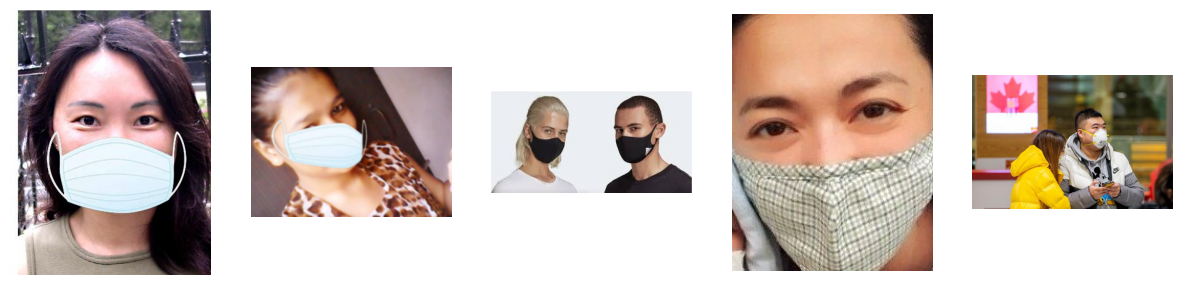

In [ ]:

# Get a list of image files in the "with_mask" training directory
with_mask_images = os.listdir(train_with_mask_dir)

# Randomly select 5 images from the list
random_with_mask_images = random.sample(with_mask_images, 5)

# Display the selected images
plt.figure(figsize=(15, 5))
for i, image_name in enumerate(random_with_mask_images):
    image_path = os.path.join(train_with_mask_dir, image_name)
    img = plt.imread(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

Do the same for people without mask.

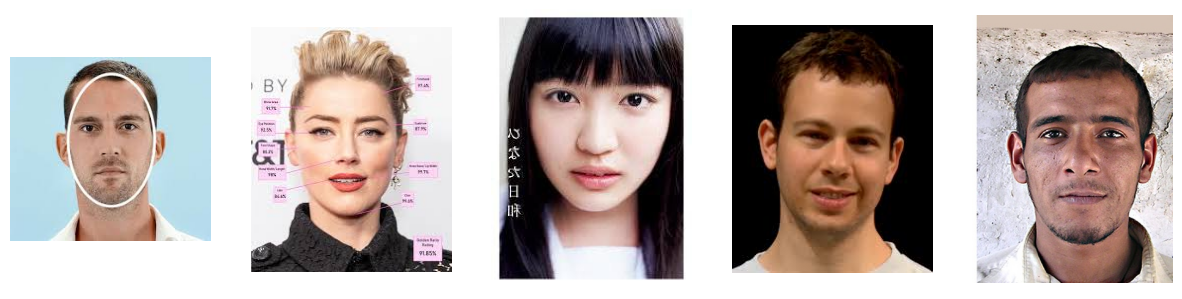

In [ ]:
# Get a list of image files in the "without_mask" training directory
without_mask_images = os.listdir(train_without_mask_dir)

# Randomly select 5 images from the list
random_without_mask_images = random.sample(without_mask_images, 5)

# Display the selected images
plt.figure(figsize=(15, 5))
for i, image_name in enumerate(random_without_mask_images):
    image_path = os.path.join(train_without_mask_dir, image_name)
    img = plt.imread(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

##Modeling

Define a model structure that can deal with the images that we have to classify them between the 2 classes.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # output

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Train the model that you defined on the training data and evaluate it on the validation data. Feel free to tune the hyperparameters of your model until you reach a satisfying result on the validation set. </br>
**N.B:** Make sure to save the model training history in a variable to plot later the learning curve.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)
# Train the model and save the training history
history = model.fit(
    train_generator,
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model weights
model.save('mask_detection_model.h5')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
23/32 [====================>.........] - ETA: 15s - loss: 0.7308 - accuracy: 0.5997

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 59s 2s/step - loss: 0.6454 - accuracy: 0.6630 - val_loss: 0.3806 - val_accuracy: 0.8542
Epoch 2/10
32/32 [==============================] - 60s 2s/step - loss: 0.5625 - accuracy: 0.7530 - val_loss: 0.3408 - val_accuracy: 0.8646
Epoch 3/10
32/32 [==============================] - 56s 2s/step - loss: 0.4413 - accuracy: 0.7980 - val_loss: 0.3209 - val_accuracy: 0.8906
Epoch 4/10
32/32 [==============================] - 60s 2s/step - loss: 0.4236 - accuracy: 0.8050 - val_loss: 0.2956 - val_accuracy: 0.9062
Epoch 5/10
32/32 [==============================] - 56s 2s/step - loss: 0.4123 - accuracy: 0.8190 - val_loss: 0.3140 - val_accuracy: 0.8854
Epoch 6/10
32/32 [==============================] - 60s 2s/step - loss: 0.4293 - accuracy: 0.8220 - val_loss: 0.3216 - val_accuracy: 0.8750
Epoch 7/10
32/32 [==============================] - 57s 2s/step - loss: 0.3872 - accuracy: 0.8230 - val_loss: 0.2546 - val_accuracy: 0.9167
Epoch 8/10
32/32 [=============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plot the accuracy curve and see if your model is overfit.

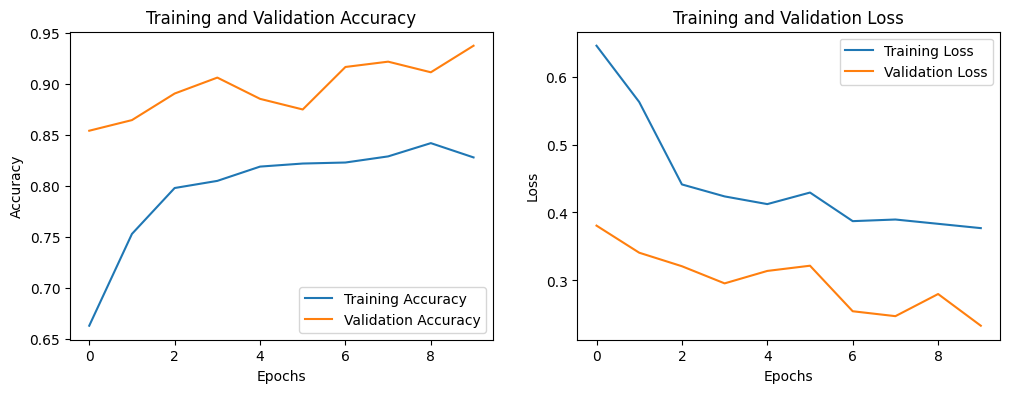

In [ ]:
# Plot the learning curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

**Good Fit:the training and validation accuracy curves follow a similar trend and converge to a reasonable level, and the training and validation loss curves decrease steadily, which suggests that the model is fitting the data well without overfitting.**

##Evaluate the model


Now you will evaluate the model that you built on the testing set that you kept aside since the beginning.

In [ ]:
#Test Your Zaka
# Create a data generator for the testing set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False # Assuming binary classification
)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(test_generator)

print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing Loss:", test_loss)

Found 100 images belonging to 2 classes.
4/4 [==============================] - 1s 257ms/step - loss: 0.2804 - accuracy: 0.9000
Testing Accuracy: 90.00%
Testing Loss: 0.28041449189186096


Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

4/4 [==============================] - 2s 369ms/step
[[45  5]
 [ 5 45]]


<Figure size 800x600 with 0 Axes>

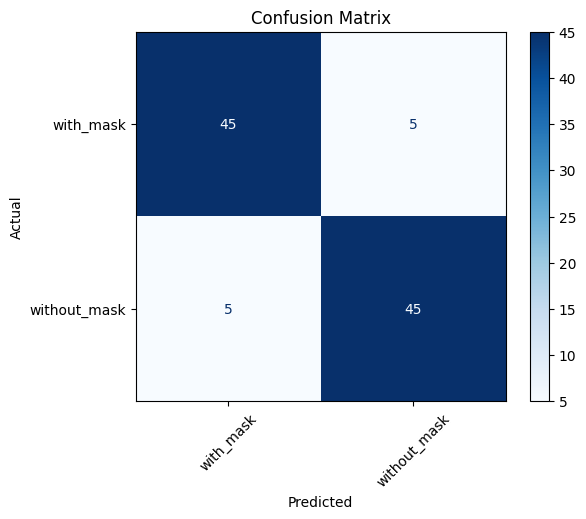

Classification Report:
               precision    recall  f1-score   support

   with_mask       0.90      0.90      0.90        50
without_mask       0.90      0.90      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Generate predictions on the testing data
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Get the true class labels for the test data
y_true = test_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print(confusion_mtx)
# Define class labels
class_labels = ["with_mask", "without_mask"]

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_mtx, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format="d")

# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.show()

# Generate a classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)

# Print the classification report
print("Classification Report:\n", report)


##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

In [ ]:
# stack predicted x Real values
combined_array = np.hstack((y_pred_classes, y_true.reshape(-1, 1)))
# this will create an array of size 100 with each row of format [predicted real] , e.g :[1 1]

# Initialize a count variable to 0
count = 0
# Iterate over the combined array
for row in combined_array:
    # Check if the first column (index 0) is different from the second column (index 1)
    if row[0] != row[1]:
        # If they are different, increment the count by 1
        count += 1

# Print the count of instances where the columns are different
print("Number of False Predictions:", count)

Number of False Predictions: 10


**Choose a Pre-trained Model: Select a pre-trained convolutional neural network (CNN) model that has been trained on a large and diverse dataset. Popular choices include models like VGG16, ResNet, or MobileNet.We will implement MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the custom model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model (you can adjust the number of epochs and other hyperparameters)
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Testing Loss: {test_loss}, Testing Accuracy: {test_accuracy}")


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
23/32 [====================>.........] - ETA: 5s - loss: 0.3313 - accuracy: 0.8455

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 31s 866ms/step - loss: 0.2968 - accuracy: 0.8640 - val_loss: 0.0591 - val_accuracy: 0.9792
Epoch 2/10
32/32 [==============================] - 25s 806ms/step - loss: 0.1208 - accuracy: 0.9470 - val_loss: 0.0808 - val_accuracy: 0.9792
Epoch 3/10
32/32 [==============================] - 23s 718ms/step - loss: 0.1179 - accuracy: 0.9510 - val_loss: 0.0639 - val_accuracy: 0.9792
Epoch 4/10
32/32 [==============================] - 23s 708ms/step - loss: 0.0975 - accuracy: 0.9670 - val_loss: 0.0334 - val_accuracy: 0.9896
Epoch 5/10
32/32 [==============================] - 23s 701ms/step - loss: 0.0910 - accuracy: 0.9640 - val_loss: 0.0661 - val_accuracy: 0.9740
Epoch 6/10
32/32 [==============================] - 22s 681ms/step - loss: 0.0666 - accuracy: 0.9760 - val_loss: 0.0300 - val_accuracy: 0.9896
Epoch 7/10
32/32 [==============================] - 27s 848ms/step - loss: 0.0743 - accuracy: 0.9680 - val_loss: 0.0449 - val_accuracy: 0.9792
Epoch 8/10

**We can notice clearly the high accuracy that we got using MobileNet and we will compare now the real vs predicted labels**

In [ ]:
#Test your Zaka
# Create a list to store predictions and real labels
predictions = []
real_labels = []

# Reset the test generator to the beginning
test_generator.reset()

# Iterate through the testing set to make predictions
for i in range(len(test_generator)):
    # Get a batch of test data and real labels
    batch_data, batch_labels = test_generator.next()

    # Make predictions for the batch
    batch_predictions = model.predict(batch_data)

    # Convert batch predictions to binary classes (0 or 1)
    batch_predictions_classes = np.round(batch_predictions).flatten().astype(int)

    # Append batch predictions and real labels to the lists
    predictions.extend(batch_predictions_classes)
    real_labels.extend(batch_labels.astype(int))

# Convert the lists to NumPy arrays for analysis
predictions = np.array(predictions)
real_labels = np.array(real_labels)
count = 0

# Print the predictions and real labels for each image
for i in range(len(predictions)):
    predicted_label = "with_mask" if predictions[i] == 0 else "without_mask"
    real_label = "with_mask" if real_labels[i] == 0 else "without_mask"

    if predicted_label != real_label:
        count += 1
        print(f"Image {i + 1}: Predicted - {predicted_label}, Real - {real_label}")

print('There are', count, 'false predictions')


1/1 [==============================] - 1s 869ms/step
Image 15: Predicted - without_mask, Real - with_mask
Image 64: Predicted - with_mask, Real - without_mask
There are 2 false predictions


**And finally we can notice that the number of false predictions decreased for sure**